In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from Graph import Graph
import networkx as nx

data = pd.read_csv('../Datasets/StackOverflowData.csv')
data.head()

,source,target,value
0,azure,.net,20.933192
1,sql-server,.net,32.322524
2,asp.net,.net,48.407030
3,entity-framework,.net,24.370903
4,wpf,.net,32.350925


In [11]:
df_nodes = data['source'].unique().tolist()

list

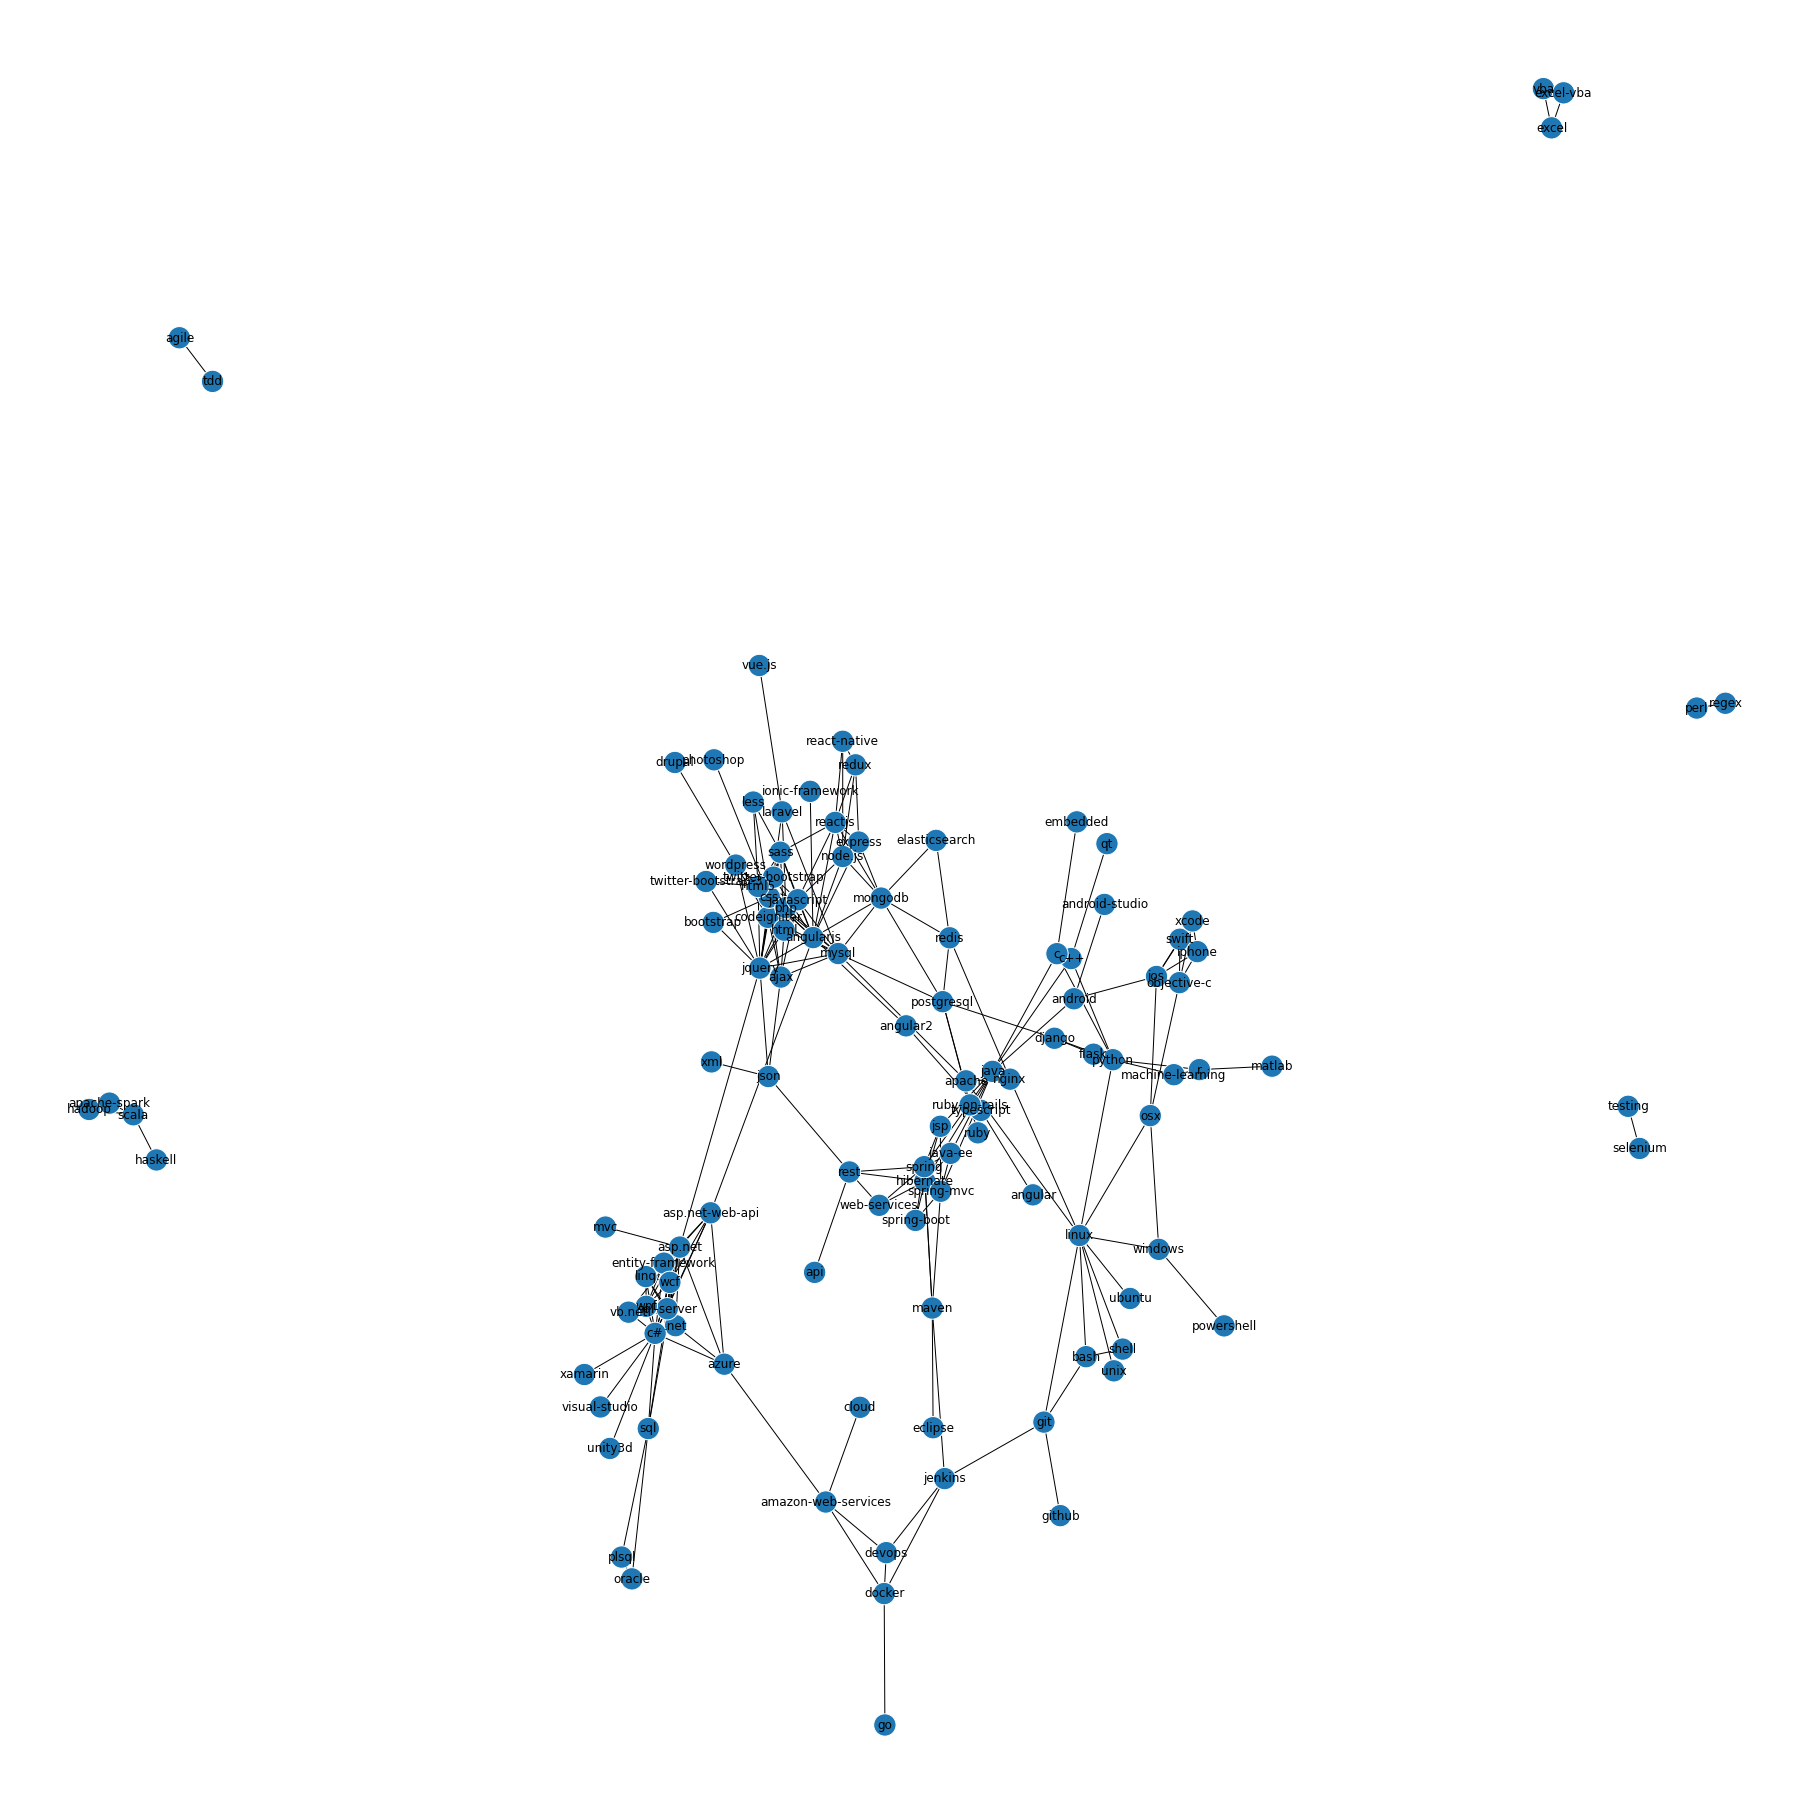

In [27]:
G = nx.Graph(day="Stackoverflow")
#df_nodes = pd.read_csv('../input/stack_network_nodes.csv')
df_edges = pd.read_csv('../Datasets/StackOverflowData.csv')

#for index, row in df_nodes.iterrows():
    #G.add_node(row['name'], group=row['group'], nodesize=row['nodesize'])
    
for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['value'])])
    
#color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
#             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
#             13:'#d6dcff', 14:'#d2f5f0'} 

plt.figure(figsize=(25,25))
options = {
    'edge_color': '#000',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}
#colors = [color_map[G.node[node]['group']] for node in G]
sizes = [500 for node in G]

"""
Using the spring layout : 
- k controls the distance between the nodes and varies between 0 and 1
- iterations is the number of times simulated annealing is run
default k=0.1 and iterations=50
"""
nx.draw(G, node_size=sizes, pos=nx.spring_layout(G, k=0.25, iterations=50), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#FFFFFF") 
plt.show()